# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


In [229]:
# Parameters
m = 1
A = 0.001#0.03375#0.03#0.1124921875#0.125
run = 1

1

In [230]:
res=m;
N=2.0^m*500.0#2.0^m*1000.0;#2.0^m*500.0;#N=2.0^m*500.0#2.0^m*100.0;
Xf=1.0;

dx=Xf/N;
dt=round(dx,digits=10);
Nt=2.0^m*500.0#100.0*2^m*10
Tf=Nt*dt; #final time
print(Tf)

1.0

In [231]:
print(N)

1000.0

In [232]:
println("dx =", dx)
println("dt =", dt)
println("dx/dt =", dx/dt)

dx =0.001
dt =0.001
dx/dt =1.0


In [233]:
# Setting RESOLUTION

global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"
#global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

# Grid

In [234]:
ori=0.0;
initX1 = nothing
initX1=range(ori, stop=Xf, step=dx);

In [235]:
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)

L=length(initX);
println("step size is  ", dx)

#T=range(dt,stop=Tf,step=dt)
#T=range(0,stop=Tf,step=dt)
println("the time step is ", dt)

step size is  0.001
the time step is 0.001


In [236]:
using Printf
include("./ScalarField.jl");

# Initial data of m β Ψ and Ψ,x

In [237]:
using PyCall   
using Interpolations
using Dierckx


####

initm=zeros(L);
initbeta=zeros(L);
initpsi=zeros(L);
initderpsi=zeros(L);

state_array=[initm initbeta initpsi initderpsi initX];

#PSI
r0=0.7#0.3
sigma=0.3
initpsi[4:L-3] = init_gaussian(initX1,r0,sigma,A)

state_array[:,3] = initpsi
state_array = ghost(state_array)

#PSI,X FROM PSI
"""for i in 4:L-3
    initderpsi[i]=Der(state_array[:,:],i,3,initX)
end

state_array[:,4] = initderpsi
state_array = ghost(state_array)"""

#new
initderpsi[4:L-3] = init_gaussian_der(initX1,r0,sigma,A)
state_array[:,4] = initderpsi
state_array=ghost(state_array)

####


#psi_func = Spline1D(initX[4:L-3], state_array[4:L-3,3],  k=4)
derpsi_func = Spline1D(initX[4:L-3], initderpsi[4:L-3],  k=4, bc="extrapolate");#new

#funcs = [psi_func, derpsi_func];

In [238]:
#m, beta, psi

dergrid_func=der_grid(initX)
funcs=[derpsi_func dergrid_func]
y0=[0 0 0]
state_array[4:L-3,1:3] = n_rk4wrapper(RHS,y0,initX1,0,funcs);

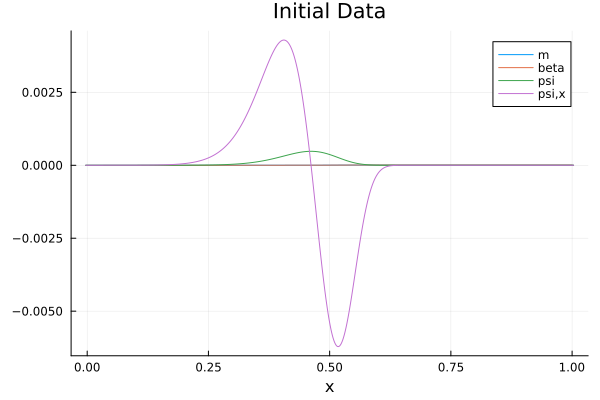

In [239]:
using Plots #showing initial data and the initial status of the horizon finder
plot(initX, state_array[:,1:4], xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"])

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [240]:
using CSV, Tables
#CSV.write(dir*"/time_step0.csv", Tables.table(transpose(Matrix(state_array))), writeheader=false)
CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

open(dir*"/res$res/data.txt", "w") do file
    print_muninn(file, 0, state_array[:,1:5])
end

In [241]:
timestep=0
criticality=0.0
explode=0.0
evol_stats = [run criticality A sigma r0 timestep explode]
monitor_ratio = zeros(L)
CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["run", "criticality", "A", "sigma", "r0", "timestep", "explode"])

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/parameters.csv"

In [242]:
ginit=dt_scale(initX,state_array[:,1],state_array[:,2],dx)
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

1.0


 ## Time evolution

fixed grid

In [243]:
finaltime=0.08#0.2#5#3#1
stats,T_interp = timeevolution(state_array,finaltime,dir,dt,run);
CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);

iteration 1 dt is 0.001, time of iteration is 0.001
xtilde_func(0) -0.0005000000000000001
auxX[-0.0005000000000000001, 0.0005009995]
auxdata[:,1:3][0.0 0.0 0.0; 3.01376743414989e-24 3.904894358068982e-21 3.3526108338356147e-14]
timestep [3.01376743414989e-24, 3.904894358068982e-21, 3.3526108338356147e-14]
iteration 2 dt is 0.001, time of iteration is 0.002
xtilde_func(0) -0.001000500125
auxX[-0.001000500125, 1.5003739997505308e-6]
auxdata[:,1:3][0.0 0.0 0.0; 2.027528005854715e-17 1.3513433200995872e-11 1.4707920692335997e-13]
timestep [2.027528005854715e-17, 1.3513433200995872e-11, 1.4707920692335997e-13]
iteration 3 dt is 0.001, time of iteration is 0.003
xtilde_func(0) -0.0015015011256252504
auxX[-0.0015015011256252504, 0.0005045018653660137]
auxdata[:,1:3][0.0 0.0 0.0; 2.257712900923892e-19 4.034625902742271e-16 2.3006528349954065e-12]
timestep [2.257712900923892e-19, 4.034625902742271e-16, 2.3006528349954065e-12]
iteration 4 dt is 0.001, time of iteration is 0.004
xtilde_func(0) -0

iteration 29 dt is 0.001, time of iteration is 0.02900000000000002
xtilde_func(0) -0.014705829677227968
auxX[-0.014705829677227968, 0.0007350729908138274]
auxdata[:,1:3][0.0 0.0 0.0; 0.014684231419297845 26.404574662795238 0.00023644212691532494]
timestep [0.014684231419297845, 26.404574662795238, 0.00023644212691532494]
iteration 30 dt is 0.001, time of iteration is 0.03000000000000002
xtilde_func(0) -0.015220643637618445
auxX[-0.015220643637618445, 0.00023580779363848987]
auxdata[:,1:3][0.0 0.0 0.0; -11.120457908934876 7551.756707671386 0.0007254676693963583]
timestep [-11.120457908934876, 7551.756707671386, 0.0007254676693963583]
iteration 31 dt is 0.001, time of iteration is 0.03100000000000002
xtilde_func(0) -0.015735980115252433
auxX[-0.015735980115252433, 0.000767252354287571]
auxdata[:,1:3][0.0 0.0 0.0; -0.042075233761922626 152.63589336030637 0.0005867435039085973]
timestep [-0.042075233761922626, 152.63589336030637, 0.0005867435039085973]
iteration 32 dt is 0.001, time of ite

xtilde_func(0) -0.028262904200949412
auxX[-0.028262904200949412, 0.0002539486940509256]
auxdata[:,1:3][0.0 0.0 0.0; -1.0733677861665697e13 1.0114719296176313e10 -0.6986544429214381]
timestep [-1.0733677861665697e13, 1.0114719296176313e10, -0.6986544429214381]
iteration 56 dt is 0.001, time of iteration is 0.05600000000000004
xtilde_func(0) -0.028791566501027297
auxX[-0.028791566501027297, 0.0008108954794378002]
auxdata[:,1:3][0.0 0.0 0.0; -1.210422156142199e10 6.643900778758814e7 -0.31738176992496664]
timestep [-1.210422156142199e10, 6.643900778758814e7, -0.31738176992496664]
iteration 57 dt is 0.001, time of iteration is 0.057000000000000044
xtilde_func(0) -0.029320772544679123
auxX[-0.029320772544679123, 0.0003117060461414982]
auxdata[:,1:3][0.0 0.0 0.0; -1.3830339138484035e13 8.898471844394957e9 -0.8751168514295641]
timestep [-1.3830339138484035e13, 8.898471844394957e9, -0.8751168514295641]
iteration 58 dt is 0.001, time of iteration is 0.058000000000000045
xtilde_func(0) -0.0298505

xtilde_func(0) -0.04164453695792754
auxX[-0.04164453695792754, 0.0005910678722124905]
auxdata[:,1:3][0.0 0.0 0.0; -472.4047063984413 31096.656836610593 -0.003618359611027919]
timestep [-472.4047063984413, 31096.656836610593, -0.003618359611027919]


 ## Movie of the evolution

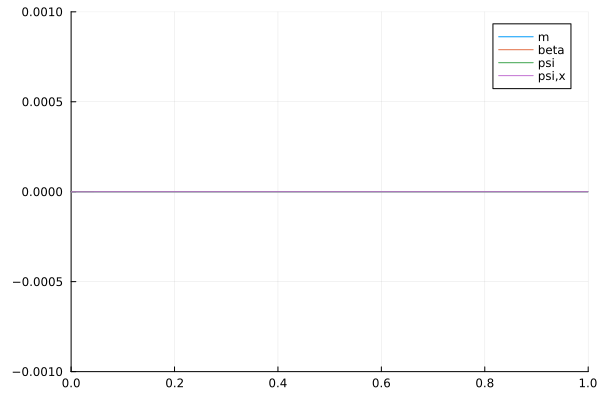

[ Info: Saved animation to /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/changing-grid/anim_res1.gif


Plots.AnimatedGif("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/changing-grid/anim_res1.gif")
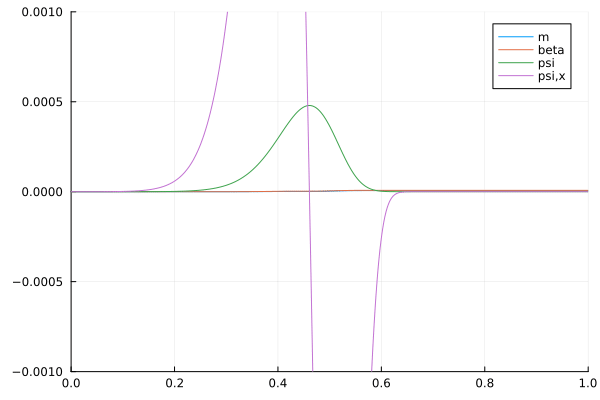

In [244]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 1:1:80#length(T)-1
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
        plot3=functions3.Column3[4:L-3];
        plot4=functions3.Column4[4:L-3];
        plot5=functions3.Column5[4:L-3];
    
    #plot!(X1, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"],ylim=[-0.1,0.1], xlim=[0, 0.1]) |> display 
    plot!(plot5, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"],ylim=[-0.001,0.001], xlim=[0, 1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 10)

In [190]:
x_func=Spline1D(state_array[4:L-3,5],initX1)
x_func(0) #this works better
ori=find_origin(state_array[:,5]);
#rk4 will be on x from x=0 to x_func(state_array[ori,5])


LoadError: Error on entry, no approximation returned. The following conditions
must hold:
1<=k<=5
x[1] < x[2] < ... < x[end]
w[i] > 0.0 for all i

Additionally, if spline knots are given:
length(xknots) <= length(x) + k + 1
x[1] < xknots[1] < xknots[k+2] < ... < xknots[end] < x[end]
The schoenberg-whitney conditions: there must be a subset of data points
xx[j] such that t[j] < xx[j] < t[j+k+1] for j=1,2,...,n-k-1

In [191]:
y0=[0 0 0]
auxX=initX[4:ori]
#aux_state_array[1:2,1:3] = n_rk4wrapper(RHS,y0,auxX,t,funcs)

Float64[]

In [192]:
initX[ori]

LoadError: ArgumentError: invalid index: 0.0 of type Float64

In [117]:
der_grid(state_array[:,5])
scatter(initX1,state_array[4:L-3,5],xlim=[-0.1,0.1])
aa=Spline1D(initX1,state_array[4:L-3,5])
aa(0) #this works better

-0.17635822570890156

In [286]:
der_grid(state_array[:,5])
scatter(state_array[4:L-3,5], initX1,xlim=[-0.1,0.1])
aa=Spline1D(state_array[4:L-3,5], initX1)
roots(aa)

1-element Vector{Float64}:
 -0.17635822570890153

In [341]:
xtilde_func=Spline1D(initX1,state_array[4:L-3,5]);
xtilde_func(0)
X=state_array[:,5]
ori=find_origin(X)
auxX=vcat(xtilde_func(0),X[ori:L-3]);

In [161]:
derpsi_func = Spline1D(X[ori:L-3],state_array[ori:L-3,4],k=4)#new
dergrid_func=der_grid(X)
funcs=[derpsi_func dergrid_func];

In [162]:
y0=[0 0 0]
state_array[ori-1:L-3,5]=auxX
state_array[ori-1:L-3,1:3] = n_rk4wrapper(RHS,y0,auxX,0,funcs)#*dxtilde/dx = 1!!!??aqui

1002×3 Matrix{Float64}:
 0.0          0.0           0.0
 0.0          0.0           5.3865e-48
 1.27058e-23  1.49447e-20   4.40117e-14
 3.35876e-22  2.08883e-19   3.58695e-13
 2.61485e-21  1.08216e-18   1.23331e-12
 1.14703e-20  3.55018e-18   2.97827e-12
 3.65318e-20  9.02145e-18   5.92618e-12
 9.493e-20    1.94859e-17   1.04329e-11
 2.14315e-19  3.76135e-17   1.68786e-11
 4.36473e-19  6.68647e-17   2.56691e-11
 8.21626e-19  1.11613e-16   3.72366e-11
 1.4535e-18   1.7728e-16    5.20414e-11
 2.44527e-18  2.70491e-16   7.05731e-11
 ⋮                         
 0.000659922  0.0007499    -7.67446e-18
 0.000659922  0.0007499    -7.67446e-18
 0.000659922  0.0007499    -7.67446e-18
 0.000659922  0.0007499    -7.67446e-18
 0.000659922  0.0007499    -7.67446e-18
 0.000659922  0.0007499    -7.67446e-18
 0.000659922  0.0007499    -7.67446e-18
 0.000659922  0.0007499    -7.67446e-18
 0.000659922  0.0007499    -7.67446e-18
 0.000659922  0.0007499    -7.67446e-18
 0.000659922  0.0007499    -7.67446e-

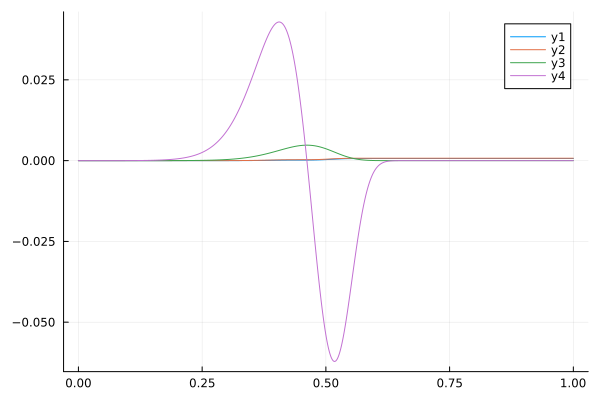

In [164]:
plot(X[ori:L-3], state_array[ori:L-3,1:4])